# Image Colorization with DDColor

**Colorize black-and-white photos — powered by [DDColor (ICCV 2023)](https://arxiv.org/abs/2212.11613)**.

---

### Features
- **State-of-the-art AI (SOTA) quality**
- **No training needed** — zero-shot on any B&W image
- **GPU acceleration** (auto-detected)
- **Saves output as `original_colorized.jpg`**

> **Model**: `damo/cv_ddcolor_image-colorization`  

---

## 1. Install Dependencies (Run Once)

Installs `modelscope[cv]`, `timm`, and OpenCV.  
First run: ~2–3 min (downloads model)  
Later runs: instant (cached)

In [23]:
%%capture
%pip install -q "modelscope[cv]" timm opencv-python
print("✅ Dependencies installed (modelscope, timm, opencv-python).")

## 2. Load Model & Colorize Image

Upload your B&W image (e.g., `sample_image.png`) to the notebook folder.

In [24]:
import cv2
import matplotlib.pyplot as plt
from modelscope.hub.snapshot_download import snapshot_download
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
from modelscope.outputs import OutputKeys
from pathlib import Path
import os

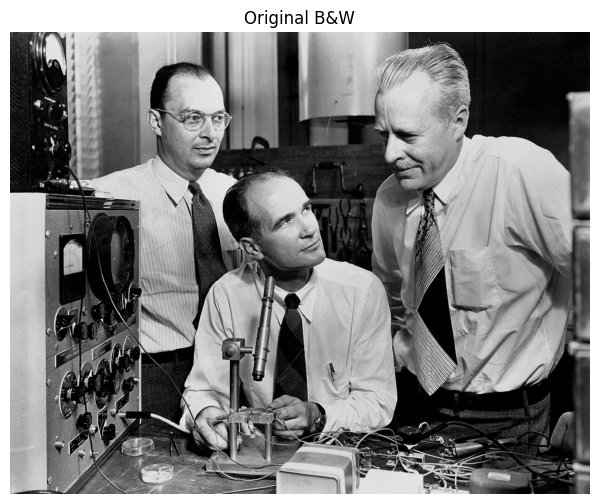

In [25]:
# INPUT: Change this to your image filename
input_image = "sample_image.png"  # Path to a black and white image

# Read and convert to RGB
img_bgr = cv2.imread(input_image)
if img_bgr is None:
    raise FileNotFoundError(f"Image not found: {input_image}")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show original
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb, cmap='gray')
plt.title("Original B&W")
plt.axis('off')
plt.show()

In [ ]:
MODEL_ID = "damo/cv_ddcolor_image-colorization"
CACHE_DIR = os.getenv("MODELSCOPE_CACHE", os.path.expanduser("~/.cache/modelscope"))
os.makedirs(CACHE_DIR, exist_ok=True)

print("Checking DDColor model cache...")

model_path = snapshot_download(
    MODEL_ID,
    revision="v1.02",
    cache_dir=CACHE_DIR,
    ignore_file_pattern=None,   # don’t skip any files
)

print(f"✅ Model available at: {model_path}")

if "colorizer" not in globals():
    print("Initializing DDColor model (first time only)...")
    from modelscope.pipelines import pipeline
    from modelscope.utils.constant import Tasks
    colorizer = pipeline(
        task=Tasks.image_colorization,
        model=model_path, 
        model_revision="v1.02",
        cache_dir=CACHE_DIR
    )
else:
    print("✅ DDColor already loaded — reusing from memory.")

Colorizing...


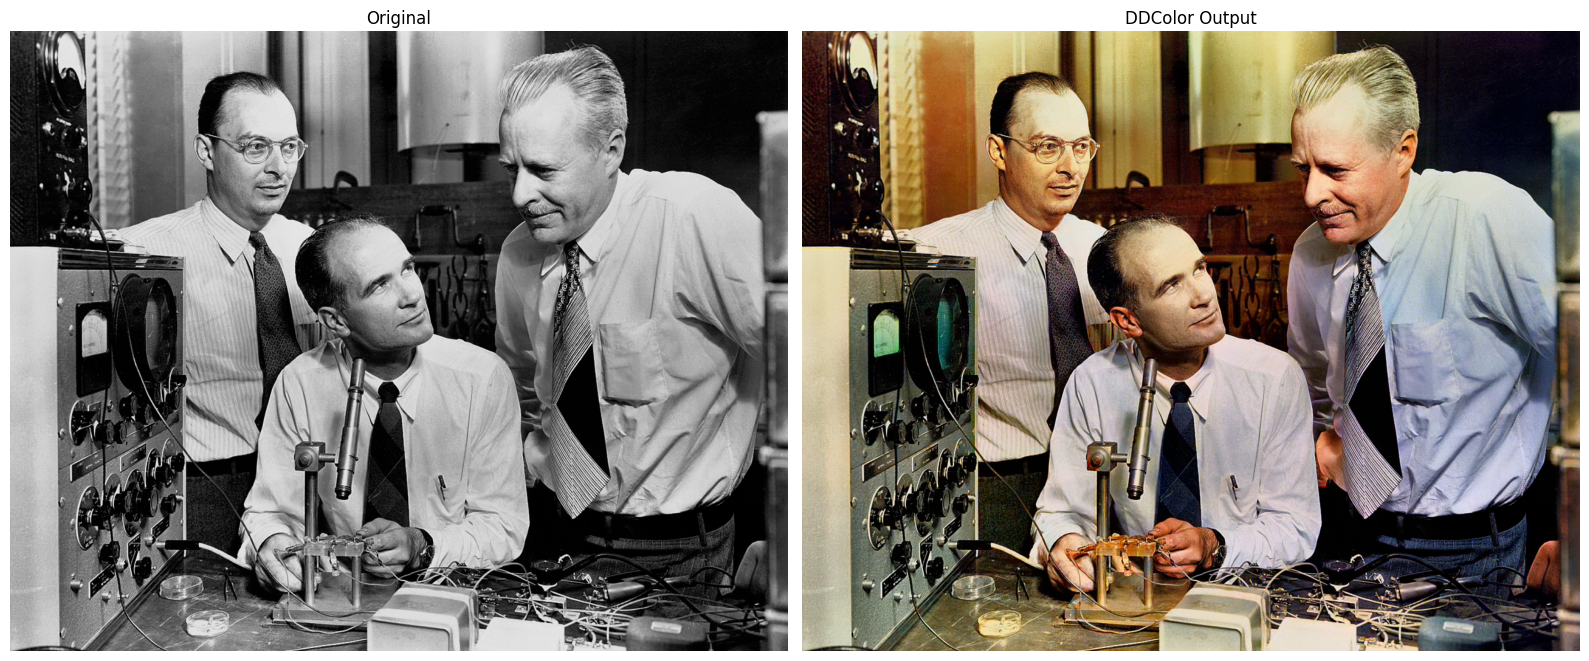

In [27]:
# Colorize
print("Colorizing...")
result = colorizer(img_rgb)
colorized_rgb = cv2.cvtColor(result[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB)

# Show result
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img_rgb, cmap='gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(colorized_rgb)
ax[1].set_title("DDColor Output")
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [28]:
# SAVE: original_colorized.jpg in same folder
orig_path = Path(input_image)
output_path = orig_path.with_name(f"{orig_path.stem}_colorized{orig_path.suffix}")

cv2.imwrite(str(output_path), cv2.cvtColor(colorized_rgb, cv2.COLOR_RGB2BGR))
print(f"The colorized image is saved as: {output_path}")

The colorized image is saved as: sample_image_colorized.png
